 ### 探索其中数据(暂时)影响结果的因素

#### 一、单变量分析

In [1]:
import pandas as pd
import os
import math      
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import time
import warnings 
import seaborn as sns 
warnings.filterwarnings('ignore') 

In [2]:
# 读取数据
B_data=pd.read_csv("../../dataSet/GT3X-V2.8-00/B_data.csv")
T_data=pd.read_csv("../../dataSet/GT3X-V2.8-00/T_data.csv")

In [3]:
B_data=B_data.drop(["PAD ID","Barcode","Image" ,"Unnamed: 11"],axis=1)# 删除没有用的列
T_data=T_data.drop(["PAD ID","Barcode","Image" ,"Unnamed: 11"],axis=1) 
B_data=B_data[B_data["Result"]!="Result"]
T_data=T_data[T_data["Result"]!="Result"]

In [4]:
B_data["Result"]=B_data["Result"].apply(lambda x: 1 if x=="GOOD"  else 0)
T_data["Result"]=T_data["Result"].apply(lambda x: 1 if x=="GOOD"  else 0)

In [5]:
B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
0,1:C2,98.832,106.662,92.660,0.005,0.000,1,1
1,1:C2,95.402,100.189,95.222,0.000,0.000,1,1
2,1:C10,103.047,111.748,92.214,-0.011,0.007,1,1
3,1:C10,105.500,117.418,89.850,0.000,0.007,1,1
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,1,1


In [10]:
B_data.to_csv("../../dataSet/GT3X-V2.8-00/Bdata.csv")
T_data.to_csv("../../dataSet/GT3X-V2.8-00/Tdata.csv")

### 读取数据

In [6]:
B_data=pd.read_csv("../../dataSet/GT3X-V2.8-00/Bdata.csv",  index_col="Unnamed: 0")
T_data=pd.read_csv("../../dataSet/GT3X-V2.8-00/Tdata.csv",  index_col="Unnamed: 0")

In [7]:
B_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6557880 entries, 0 to 6559432
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Component ID  object 
 1   Volume(%)     float64
 2   Height(um)    float64
 3   Area(%)       float64
 4   OffsetX(mm)   float64
 5   OffsetY(mm)   float64
 6   Result        int64  
 7   Panel         float64
dtypes: float64(6), int64(1), object(1)
memory usage: 450.3+ MB


In [8]:
cols=["Volume(%)","Height(um)","Area(%)" , "OffsetX(mm)" ,"OffsetY(mm)" ,"Panel"]
for col in tqdm(cols):  
    B_data[col] = B_data[col].astype(float)
    T_data[col] = T_data[col].astype(float)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.28it/s]


In [9]:
# 单变量分析
B_data[B_data["Result"]==1]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
0,1:C2,98.832,106.662,92.660,0.005,0.000,1,1.0
1,1:C2,95.402,100.189,95.222,0.000,0.000,1,1.0
2,1:C10,103.047,111.748,92.214,-0.011,0.007,1,1.0
3,1:C10,105.500,117.418,89.850,0.000,0.007,1,1.0
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,1,1.0
...,...,...,...,...,...,...,...,...
6559428,1:VT3,113.166,110.799,102.136,-0.005,0.016,1,10.0
6559429,1:VT3,131.565,120.853,108.864,0.011,0.002,1,10.0
6559430,1:VT4,124.038,124.045,99.994,-0.015,0.008,1,10.0
6559431,1:VT4,92.592,88.401,104.741,-0.003,0.008,1,10.0


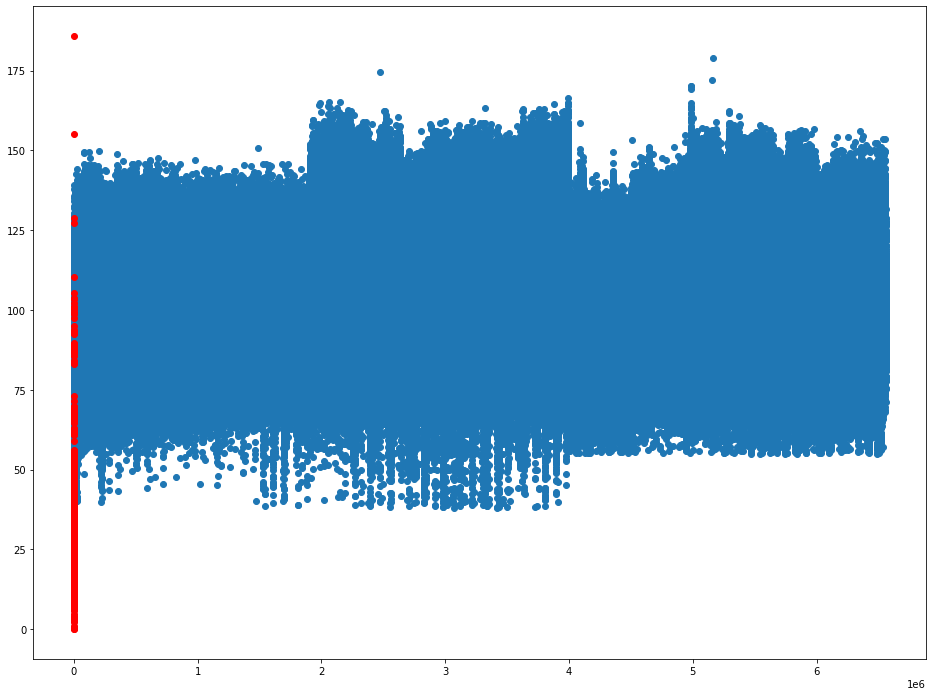

In [10]:
# Volume(%)体积
plt.figure(figsize=(16,12))
plt.scatter(x=range(len(B_data[B_data["Result"]==1]["Volume(%)"])),y=B_data[B_data["Result"]==1]["Volume(%)"])
plt.scatter(x=range(len(B_data[B_data["Result"]==0]["Volume(%)"])),y=B_data[B_data["Result"]==0]["Volume(%)"],c="r")
plt.show()

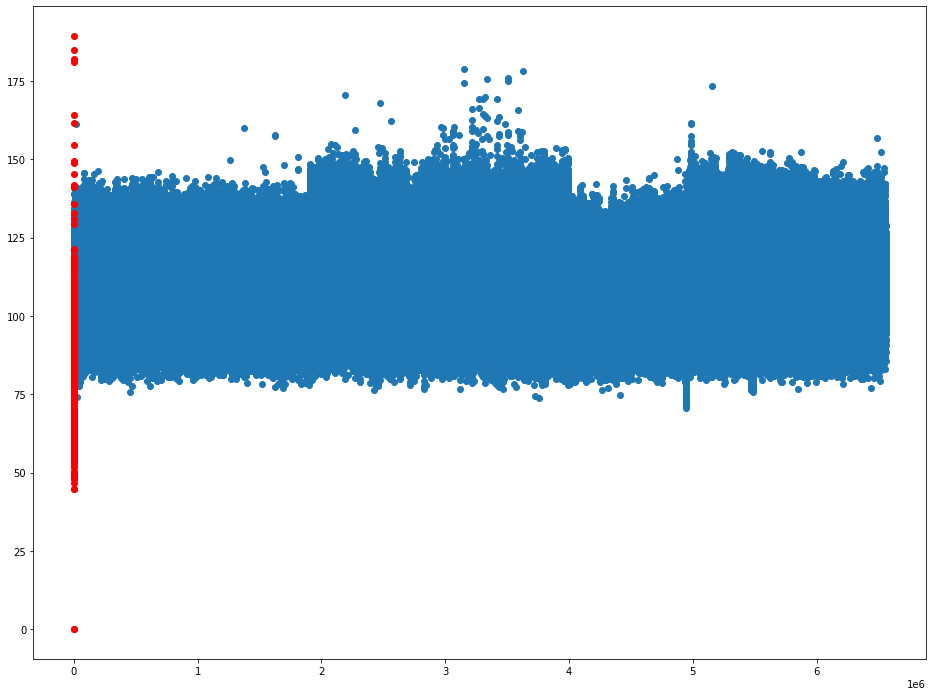

In [19]:
# Height(um)体积
plt.figure(figsize=(16,12))
plt.scatter(x=range(len(B_data[B_data["Result"]==1]["Height(um)"])),y=B_data[B_data["Result"]==1]["Height(um)"])
plt.scatter(x=range(len(B_data[B_data["Result"]==0]["Height(um)"])),y=B_data[B_data["Result"]==0]["Height(um)"],c="r")
plt.show()

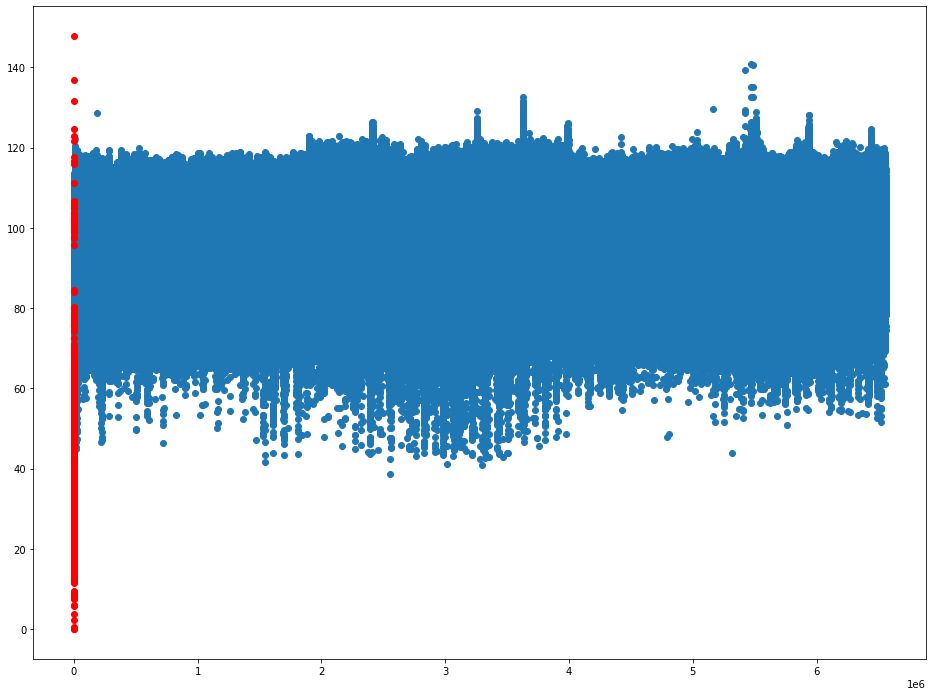

In [20]:
#  Area(%) 
plt.figure(figsize=(16,12))
plt.scatter(x=range(len(B_data[B_data["Result"]==1]["Area(%)"])),y=B_data[B_data["Result"]==1]["Area(%)"])
plt.scatter(x=range(len(B_data[B_data["Result"]==0]["Area(%)"])),y=B_data[B_data["Result"]==0]["Area(%)"],c="r")
plt.show()

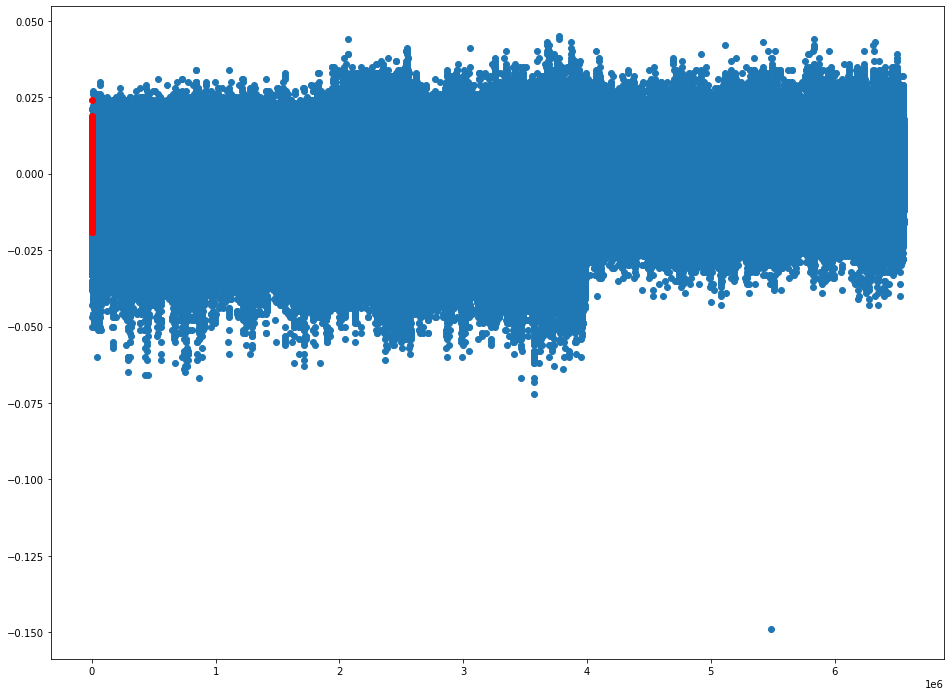

In [21]:
#  OffsetX(mm)
plt.figure(figsize=(16,12))
plt.scatter(x=range(len(B_data[B_data["Result"]==1]["OffsetX(mm)"])),y=B_data[B_data["Result"]==1]["OffsetX(mm)"])
plt.scatter(x=range(len(B_data[B_data["Result"]==0]["OffsetX(mm)"])),y=B_data[B_data["Result"]==0]["OffsetX(mm)"],c="r")
plt.show()

In [23]:
import random
[random.uniform(0, 1) for i in range(len(B_data[B_data["Result"]==1]["OffsetY(mm)"]))]

[0.3897335399701457,
 0.5908194805971614,
 0.6034084708487472,
 0.2766402761673854,
 0.24187752830834353,
 0.21120397891882026,
 0.13876531940526737,
 0.3588829056913303,
 0.91290612516088,
 0.6486465963821849,
 0.16485400730389577,
 0.1331513174948733,
 0.861600374572771,
 0.9017260266263553,
 0.9413605216398121,
 0.11685713405117071,
 0.42166972515424284,
 0.7371005636629033,
 0.27634340234183075,
 0.819799804799143,
 0.19606966994055453,
 0.3890249912083713,
 0.7306864125959888,
 0.6849001544052288,
 0.8159228282142377,
 0.3700158887241223,
 0.15730028700979604,
 0.6028575127446947,
 0.9264892436596065,
 0.8541915919779195,
 0.9743252660788779,
 0.45102016741684303,
 0.7135461104990036,
 0.3068813787642448,
 0.17968570857194188,
 0.8772522180628743,
 0.9783892388594917,
 0.9732042420685162,
 0.5722011211016351,
 0.9790827388124529,
 0.5447007102797173,
 0.008081323414365849,
 0.16049496532382812,
 0.46217339751407926,
 0.4646645477291187,
 0.3697377867567151,
 0.6737749848976374,
 0

In [39]:
xticl=[" ","OffsetX(mm)"," ","OffsetY(mm)"," "]


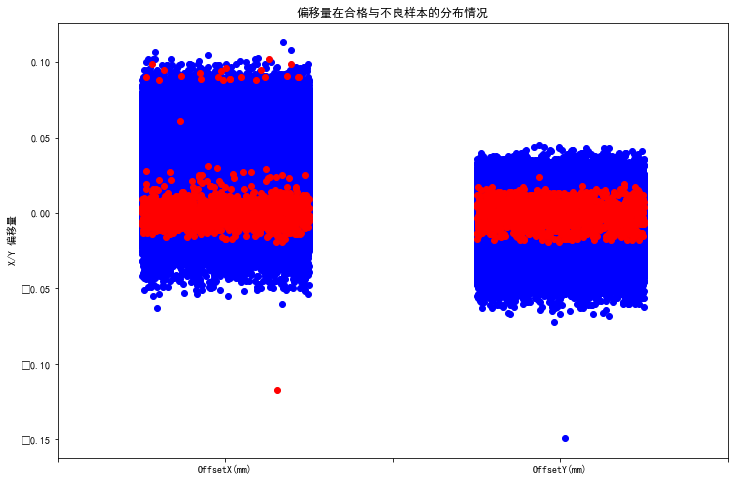

In [40]:
#  OffsetY(mm)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(12,8))
plt.scatter(x= [random.uniform(0.5, 1.5) for i in range(len(B_data[B_data["Result"]==1]["OffsetY(mm)"]))],y=B_data[B_data["Result"]==1]["OffsetY(mm)"],c="b")
plt.scatter(x= [random.uniform(0.5, 1.5) for i in range(len(B_data[B_data["Result"]==0]["OffsetY(mm)"]))] ,y=B_data[B_data["Result"]==0]["OffsetY(mm)"],c="r")


plt.scatter(x= [random.uniform(2.5, 3.5) for i in range(len(B_data[B_data["Result"]==1]["OffsetX(mm)"]))],y=B_data[B_data["Result"]==1]["OffsetX(mm)"],c="b")
plt.scatter(x= [random.uniform(2.5, 3.5) for i in range(len(B_data[B_data["Result"]==0]["OffsetX(mm)"]))] ,y=B_data[B_data["Result"]==0]["OffsetX(mm)"],c="r")

plt.ylabel("X/Y 偏移量")
plt.xticks(range(len(xticl)),xticl)
plt.title("偏移量在合格与不良样本的分布情况")

plt.show()

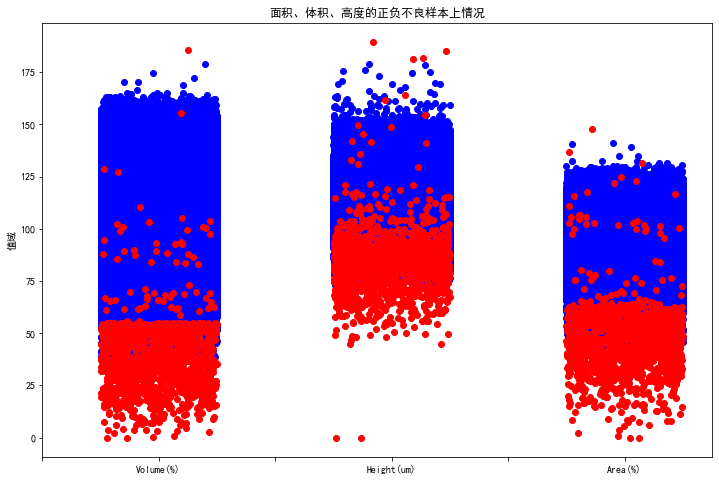

In [41]:
label= [" ","Volume(%)"," ","Height(um)"," ","Area(%)"]
plt.figure(figsize=(12,8))
plt.scatter(x= [random.uniform(0.5, 1.5) for i in range(len(B_data[B_data["Result"]==1]["Volume(%)"]))],y=B_data[B_data["Result"]==1]["Volume(%)"],c="b")
plt.scatter(x= [random.uniform(0.5, 1.5) for i in range(len(B_data[B_data["Result"]==0]["Volume(%)"]))] ,y=B_data[B_data["Result"]==0]["Volume(%)"],c="r")


plt.scatter(x= [random.uniform(2.5, 3.5) for i in range(len(B_data[B_data["Result"]==1]["Height(um)"]))],y=B_data[B_data["Result"]==1]["Height(um)"],c="b")
plt.scatter(x= [random.uniform(2.5, 3.5) for i in range(len(B_data[B_data["Result"]==0]["Height(um)"]))] ,y=B_data[B_data["Result"]==0]["Height(um)"],c="r")

plt.scatter(x= [random.uniform(4.5, 5.5) for i in range(len(B_data[B_data["Result"]==1]["Area(%)"]))],y=B_data[B_data["Result"]==1]["Area(%)"],c="b")
plt.scatter(x= [random.uniform(4.5, 5.5) for i in range(len(B_data[B_data["Result"]==0]["Area(%)"]))] ,y=B_data[B_data["Result"]==0]["Area(%)"],c="r")


plt.ylabel("值域")
plt.xticks(range(len(label)),label)
plt.title("面积、体积、高度的正负不良样本上情况")

plt.show()

### 双变量分析

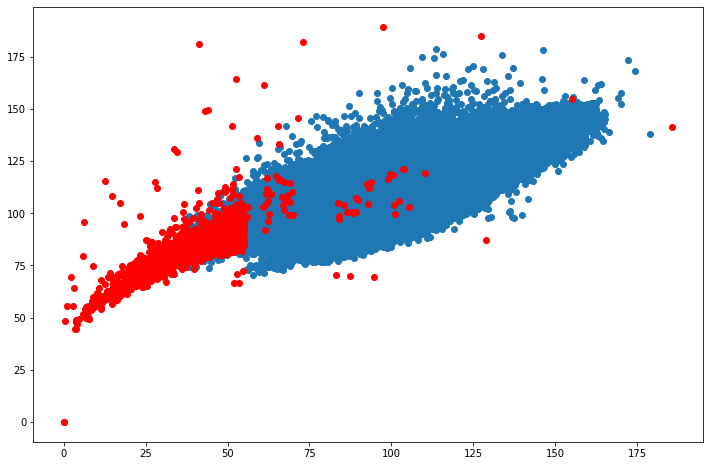

In [27]:
# Volume(%)	Height(um)	Area(%)	OffsetX(mm)	OffsetY(mm)	Result	
plt.figure(figsize=(12,8))
plt.scatter(x=B_data[B_data["Result"]==1]["Volume(%)"],y=B_data[B_data["Result"]==1]["Height(um)"])
plt.scatter(x=B_data[B_data["Result"]==0]["Volume(%)"],y=B_data[B_data["Result"]==0]["Height(um)"],c="r")
plt.show()

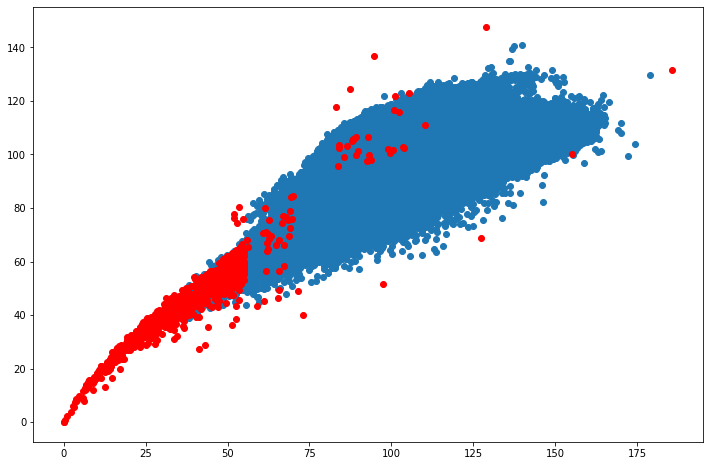

In [29]:
# Volume(%)	Height(um)	Area(%)	OffsetX(mm)	OffsetY(mm)	Result	
plt.figure(figsize=(12,8))
plt.scatter(x=B_data[B_data["Result"]==1]["Volume(%)"],y=B_data[B_data["Result"]==1]["Area(%)"])
plt.scatter(x=B_data[B_data["Result"]==0]["Volume(%)"],y=B_data[B_data["Result"]==0]["Area(%)"],c="r")
plt.show()

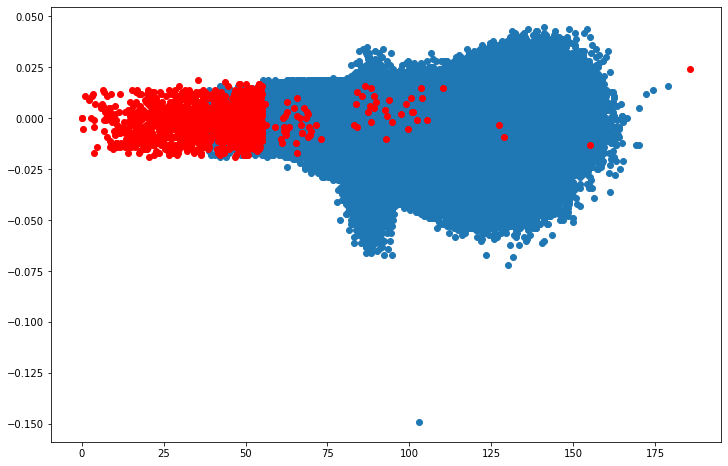

In [30]:
# Volume(%)	Height(um)	Area(%)	OffsetX(mm)	OffsetY(mm)	Result	
plt.figure(figsize=(12,8))
plt.scatter(x=B_data[B_data["Result"]==1]["Volume(%)"],y=B_data[B_data["Result"]==1]["OffsetX(mm)"])
plt.scatter(x=B_data[B_data["Result"]==0]["Volume(%)"],y=B_data[B_data["Result"]==0]["OffsetX(mm)"],c="r")
plt.show()

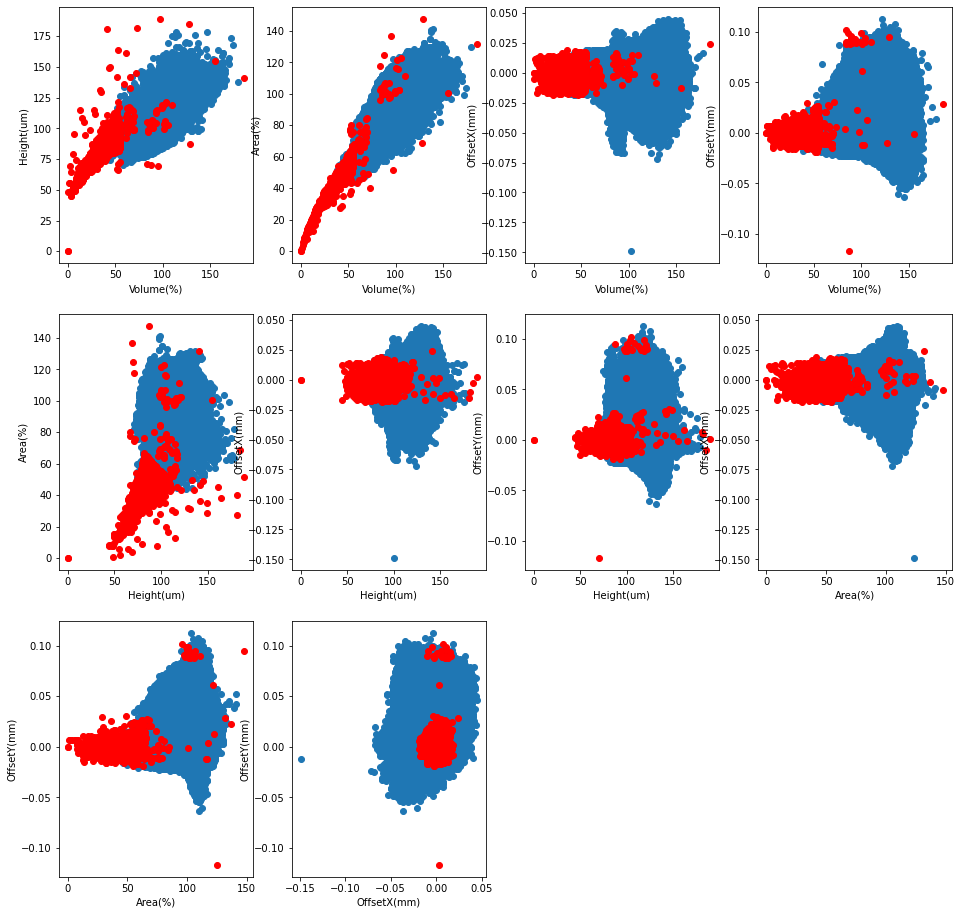

In [11]:
cols=["Volume(%)","Height(um)","Area(%)","OffsetX(mm)","OffsetY(mm)"]
plt.figure(figsize=(16,16))
k=0
for i in range(len(cols)):
    for j in cols[i+1:]:
        k+=1
        plt.subplot(3,4,k)
        plt.scatter(x=B_data[B_data["Result"]==1][cols[i]],y=B_data[B_data["Result"]==1][j])
        plt.scatter(x=B_data[B_data["Result"]==0][cols[i]],y=B_data[B_data["Result"]==0][j],c="r")
        plt.xlabel(cols[i])
        plt.ylabel(j)
plt.show()

In [ ]:
array([[1048977,      63],
       [     76,     145]])

阈值设为7
array([[1048757,     283],
       [     13,     208]])


threshold_fixed =6

array([[1048451,     589],
       [     11,     210]])

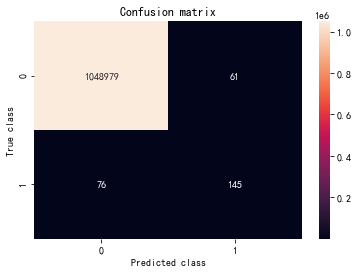

In [46]:
sns.heatmap(pd.DataFrame([[1048979,      61],
                [76,     145]]), annot=True, fmt='.20g')

plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [48]:
145/(145+76)

0.6561085972850679

In [47]:
array([[1048977,      63],
       [     76,     145]])

NameError: name 'array' is not defined